# Filtering results.json

In [1]:
%cd ../

d:\Projects\python\ex-dl\6


In [2]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import os, json
import matplotlib.pyplot as plt
import numpy as np
import cv2

from src.cfg import cfg

In [3]:
# results_dir = cfg.results_dir
results_dir = 'result/pred_only'

coco_gt = COCO(cfg.label_fp)
results_fp = os.path.join(results_dir, 'results.json')
coco_dt = coco_gt.loadRes(results_fp)

loading annotations into memory...
Done (t=1.25s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!


In [4]:
# take image_ids found in prediction
dt_ann_ids = coco_dt.getAnnIds()
image_ids = [coco_dt.loadAnns(_id)[0]['image_id'] for _id in dt_ann_ids]
image_ids = list(set(image_ids))
print(len(image_ids))

99


In [5]:
gt_ann_ids = coco_gt.getAnnIds(image_ids)

print('total anns for first 100 image_ids')
print(f'gt: {len(gt_ann_ids)}, res: {len(coco_dt.anns)}')

total anns for first 100 image_ids
gt: 658, res: 3355


evaluation with all prediction score

In [6]:
coco_eval = COCOeval(coco_gt, coco_dt, 'segm')
coco_eval.params.imgIds = image_ids
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.92s).
Accumulating evaluation results...
DONE (t=0.51s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.417
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.619
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.453
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.339
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.556
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.493
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.349
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.511
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.523
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.339
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100

In [7]:
# load all pred anns
dt_ann_ids = coco_dt.getAnnIds()
dt_anns = coco_dt.loadAnns(dt_ann_ids)
print('total anns: ', len(dt_anns))

# take only anns that have high confidence
filt_dt_anns = [dt_ann for dt_ann in dt_anns if dt_ann['score']>0.7]
print('filtered anns: ', len(filt_dt_anns))

total anns:  3355
filtered anns:  681


In [8]:
# save to new filtered.json
save_fp = os.path.join(results_dir, 'filtered_results.json')
with open(save_fp, 'w') as f:
    json.dump(filt_dt_anns, f)

In [9]:
# reload results
filtered_results_fp = os.path.join(results_dir, 'filtered_results.json')
coco_dt = coco_gt.loadRes(filtered_results_fp)
print(f'total anns: {len(coco_dt.anns)}')

Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
total anns: 681


evaluation with confident prediction scores >0.7

In [10]:
coco_eval = COCOeval(coco_gt, coco_dt, 'segm')
coco_eval.params.imgIds = image_ids
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.33s).
Accumulating evaluation results...
DONE (t=0.37s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.375
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.542
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.414
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.487
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.437
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.406
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.411
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.203
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100

mAP 37.5 using scores > 0.7. higher mAP of 41.7 when using all score ranges (effects of PRC). What about predicting on the whole val2017?

In [11]:
# load the full val prediction
results_dir = 'result/pred_only_all_samples'
results_fp = os.path.join(results_dir, 'results.json')
coco_dt = coco_gt.loadRes(results_fp)
print(f'reults:  total imgs: {len(coco_dt.imgs)}, anns: {len(coco_dt.anns)}')

Loading and preparing results...
DONE (t=2.97s)
creating index...
index created!
reults:  total imgs: 5000, anns: 170608


In [12]:
%%time
coco_eval = COCOeval(coco_gt, coco_dt, 'segm')
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=34.06s).
Accumulating evaluation results...
DONE (t=5.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.345
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.560
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.367
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.274
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.494
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.391
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.297
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.456
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.476
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.273
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=10

as reported in documents, it has mAP around 34.5

# Viz predictions
it's better to just view confidnent results

In [13]:
results_dir = 'result/pred_only'

coco_gt = COCO(cfg.label_fp)
results_fp = os.path.join(results_dir, 'filtered_results.json')
coco_dt = coco_gt.loadRes(results_fp)

loading annotations into memory...
Done (t=0.83s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!


In [14]:
# take image_ids found in prediction (only 98)
dt_ann_ids = coco_dt.getAnnIds()
image_ids = [coco_dt.loadAnns(_id)[0]['image_id'] for _id in dt_ann_ids]
image_ids = list(set(image_ids))
print(len(image_ids))
print(image_ids[:4])

98
[184321, 577539, 565778, 39956]


compare prediction and gt

In [15]:
def view_pred_gt(coco_gt, coco_dt, image_id):
    gt_ann_ids = coco_gt.getAnnIds(image_id)
    gt_anns = coco_gt.loadAnns(gt_ann_ids)

    dt_ann_ids = coco_dt.getAnnIds(image_id)
    dt_anns = coco_dt.loadAnns(dt_ann_ids)

    image_fn = coco_gt.imgs[image_id]['file_name']
    image_fp = os.path.join(cfg.data_dir, image_fn)
    image = cv2.imread(image_fp)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # f, ax = plt.subplots(1,2,figsize=(10,8))
    # ax[0].imshow(image)
    plt.imshow(image)
    coco_gt.showAnns(gt_anns)
    plt.show()

    plt.imshow(image)
    # ax[1].imshow(image)
    coco_dt.showAnns(dt_anns)
    plt.show()

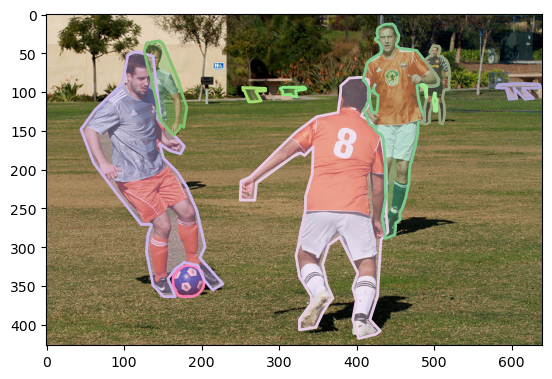

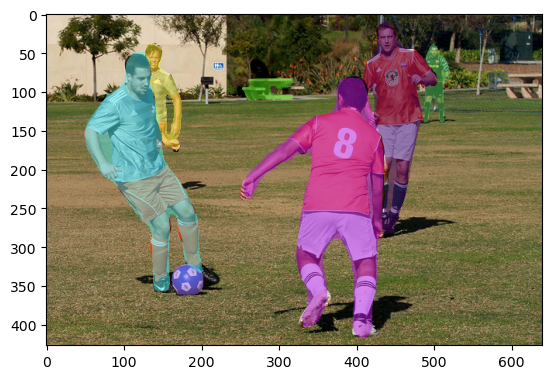

In [16]:
image_id = image_ids[10]
view_pred_gt(coco_gt, coco_dt, image_id)

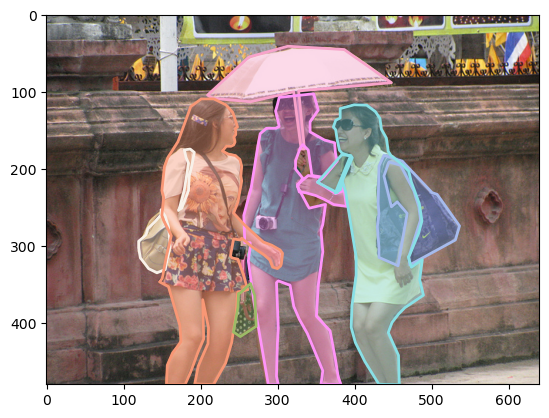

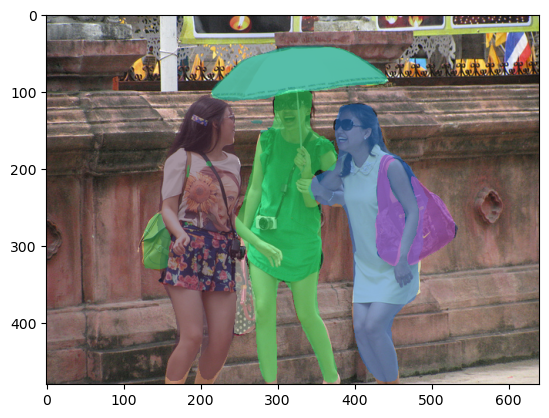

In [17]:
view_pred_gt(coco_gt, coco_dt, image_ids[49])

TODO:
- output labels and confident score
- use FiftyOne to viz predictions